<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carolina Barba Anaya e Iván Andrés Arellano Ruelas.

**Fecha:** 12 de Octubre del 2021.

**Expediente** : if720071 y im714383.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Carolina1002/ProyectoConjunto_CBarba_IArellano.git

# Tarea 5: Clase 9

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings("ignore")
import pandas as pd

### Ejercicio 1

**Solucion Carolina**

$$x = \sin^{2} (\frac{U\pi}{2}) $$

$$ \frac{dF(X)}{dx} = f(x)  $$

$$ f(x) = \frac{1}{\pi \sqrt{1-x} \sqrt x} $$

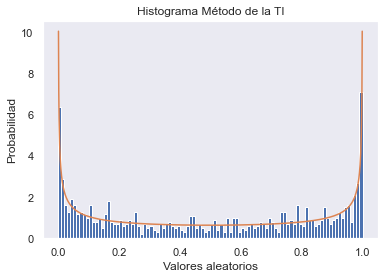

In [4]:
def m_ti(f, f_inv, N):
    u = np.random.rand(N) 
    f_r = f_inv(u) 
    x = np.arange(0, 1, (1 / N)) 
    f_d = f(x) 
    plt.figure()
    plt.hist(f_r, bins = 100, density = True)
    plt.plot(x, f_d)
    plt.xlabel("Valores aleatorios")
    plt.ylabel("Probabilidad")
    plt.title("Histograma Método de la TI")
    plt.grid()
    plt.show() 
f = lambda x : 1 / (np.pi * (1 - x)**(1 / 2) * (x)**(1 / 2)) 
f_inv = lambda u : np.sin((np.pi * u) / 2)**2 
N = 1000 
m_ti(f, f_inv, N)

**Solucion Ivan**

### Ejercicio 2

**Solucion Carolina**

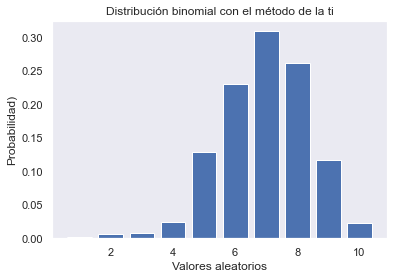

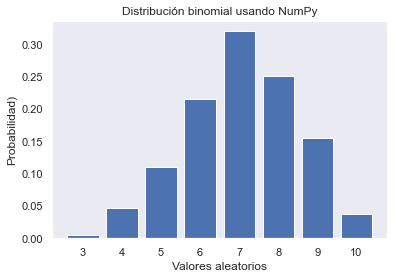

In [6]:
def dist_bin(n, p):
    prob = np.zeros(n) 
    prob[0] = (1 - p)**n 
    def llenar_vector(i):
        nonlocal prob
        prob[i + 1] = ((p / (1 - p)) * ((n - i) / (i + 1))) * prob[i]
    [llenar_vector(i) for i in range(n - 1)] 
    return np.cumsum(prob)
def dist_discreta(p_acum, N):
    x = np.random.rand(N) 
    y = pd.Series([sum([1 for p in p_acum if p < xi]) for xi in x])
    return y
def hist_dis(dist, title):
    plt.figure()
    y, x = np.histogram(dist, bins = len(set(dist)), density = True) 
    plt.bar(list(set(dist)), y)
    plt.xlabel("Valores aleatorios")
    plt.ylabel("Probabilidad)")
    plt.title(title)
    plt.grid()
    plt.show()
n, p, N = 10, 0.7, 1000 
p_acum = dist_bin(n, p) 

# Usando el método ti
bin_t = dist_discreta(p_acum, N)
hist_dis(bin_t, "Distribución binomial con el método de la ti")

# Usando numpy
bin_np = np.random.binomial(n, p, N)
hist_dis(bin_np, "Distribución binomial usando NumPy")

**Solucion Ivan**